In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files
from scipy.stats import norm as norm

In [ ]:
files.upload()

In [ ]:
df = pd.read_excel('StatComp2.xlsx')

In [ ]:
chosen_cols = ['Extroversion', 'Self Esteem', 'Likert Reported', 'EdaBaselineC', 'favgenre', 'orientation']

In [ ]:
chosen_df = df[chosen_cols]

# Data Dictionary

*chosen columns are bolded*

biopac #: Participant ID (int)

valence Order: Which group the participant was in (group 1 saw the sad clip first, group 2 saw the happy clip first, and the second clip they watched, there was non-normative social behavior performed by the confederate (a researcher diguised as a confederate))(int)

**Extroversion**: participant's score on the Big 5 Social Engagement Scale (int)

**Self Esteem**: participant's score on the Rosenburg Self Esteem Questionnaire (int)

gender: participant's gender identity (Man/Woman/Nonbinary/Genderfluid/Other) (String)

**favgenre**: participant's favorite genre of media (String)

leastfavgenre: participant's least favorite genre of media (String)

race: participant's ethnicity or racial identity (String)

shoes: how often the participant puts themself in the place of the characters in media they consume (String)

year: participant's year in college according to Degreeworks (String)

**orientation**: participant's sexual orientation (Straight, Gay/Lesbian, Bisexual, Pansexual, etc.) (String)

Age: Participant's specific age (int)

**Likert Reported**: Participant's mood on a scale from 1 (very negative) to 10 (very positive) (int)

Likert1C: Average self-reported emotional valence (on a scale from 1 (very negative) to 10 (very positive)) of the participant during the first section of the control video (float)

Likert2C: Average self-reported emotional valence (on a scale from 1 (very negative) to 10 (very positive)) of the participant during the second section of the control video (float)

**EdaBaselineC**: Baseline skin conductance measurement (float)

Eda1C: Average skin conductance of the participant during the first section of the control video (float)

Eda2C: Average skin conductance of the participant during the second section of the control video (float)

*There are a lot of other columns with experimental data, but, since I am not using them for this project, I feel it would be really reduntent to include each column of the dataset, as it continues following the same pattern for the Likert and EDA as shown above*





# Hypothesis Testing Using Chance Model

Null Hypothesis: The queer Belmont student population has significantly higher self esteem than the average Belmont student.

Alternative Hypothesis:  The queer Belmont student population does not have significantly higher self esteem than the average Belmont student.

The significance level is .05

In [ ]:
#Queer Self Esteem score
qse = chosen_df[chosen_df['orientation'] != 'Straight'] ['Self Esteem']
qem = qse.mean()
#mean Self Esteem of all groups
MeanSE = np.average(chosen_df['Self Esteem'])
#standard deviation of Self Esteem of all groups
StdSE = np.std(chosen_df['Self Esteem'])

In [ ]:
print(qem)
print(MeanSE)
print(StdSE)

16.875
18.344827586206897
4.070718500241022


In [ ]:
#generating 10,000 random variables
randsamps = norm.rvs(MeanSE, StdSE, size=10000)

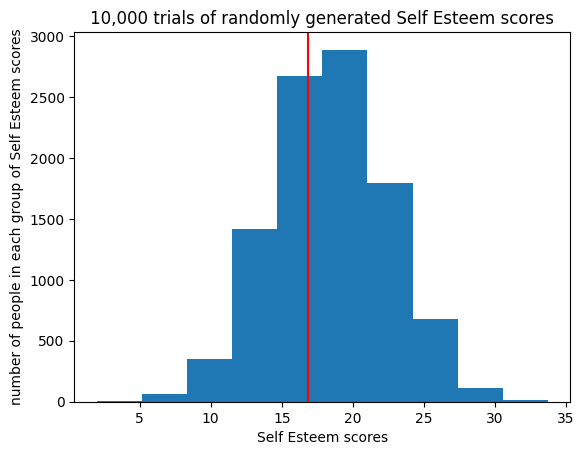

In [ ]:
#Histogram
plt.hist(randsamps)
plt.title('10,000 trials of randomly generated Self Esteem scores')
plt.xlabel('Self Esteem scores')
plt.ylabel('number of people in each group of Self Esteem scores')
plt.axvline(x = qem, c='r')

In [ ]:
#p-value
idx = np.where(randsamps < qem)[0]
p_val = len(idx)/len(randsamps)
print(p_val)

0.3522


Conclusion: We fail to reject the null hypothesis due to the high p value, indicating that it is unlikely that the queer population at Belmont has higher self esteem than most.


# Part 2 : Permutation Test

We want to know if the average baseline EDA in Horror movie lovers is *significantly* different than the average baseline EDA in Rom-com  lovers.

Null Hypothesis: Rom-com Lovers have a higher EDA on average

Alternate Hypothesis: Rom-com Lovers do not have a higher EDA on average

Significance Level: 5%

In [ ]:
avg_comedy_lover_eda = chosen_df[chosen_df['favgenre'] == 'Comedy']['EdaBaselineC'].mean()
avg_romcom_lover_eda = chosen_df[chosen_df['favgenre'] == 'Rom-com']['EdaBaselineC'].mean()
obs_stat = avg_romcom_lover_eda - avg_comedy_lover_eda
print(avg_comedy_lover_eda)
print(avg_romcom_lover_eda)
print(obs_stat)

8.49675
7.873400000000001
-0.6233499999999994


In [ ]:
eda_scores_romcom_lover = chosen_df[chosen_df['favgenre'] == 'Comedy']['EdaBaselineC']
eda_scores_comedy_lover = chosen_df[chosen_df['favgenre'] == 'Rom-com']['EdaBaselineC']
frames1 = eda_scores_romcom_lover, eda_scores_comedy_lover
EDA_scores_belmont = pd.concat(
    frames1,
    axis=0,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
comedy_lovers = chosen_df[chosen_df['favgenre'] == 'Comedy']['favgenre']
romcom_lovers = chosen_df[chosen_df['favgenre'] == 'Rom-com']['favgenre']
frames2 = comedy_lovers, romcom_lovers
favgenres_belmont = pd.concat(
    frames2,
    axis=0,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
#numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")
#favgenres_belmont =  chosen_df[chosen_df['favgenre'] == 'Comedy' OR 'Rom-com']
#print(EDA_scores_belmont)
print(favgenres_belmont)
print(EDA_scores_belmont)

1      Comedy
6      Comedy
14     Comedy
18     Comedy
19     Comedy
20     Comedy
24     Comedy
27     Comedy
0     Rom-com
2     Rom-com
3     Rom-com
4     Rom-com
8     Rom-com
9     Rom-com
13    Rom-com
15    Rom-com
22    Rom-com
26    Rom-com
Name: favgenre, dtype: object
1      7.317
6      5.152
14    11.735
18     8.865
19     8.851
20     8.089
24     1.086
27    16.879
0     10.586
2     10.961
3     10.027
4      1.112
8      3.905
9      2.147
13     2.772
15    10.154
22    15.156
26    11.914
Name: EdaBaselineC, dtype: float64


In [ ]:
def simulate_test_stat(favgenres_belmont, EDA_scores_belmont):
    comedy_scores = EDA_scores_belmont[favgenres_belmont == 'Comedy']
    romcom_scores = EDA_scores_belmont[favgenres_belmont == 'Rom-com']
    avg_eda_romcom = np.average(romcom_scores)
    avg_eda_comedy = np.average(comedy_scores)
    test_stat = avg_eda_romcom - avg_eda_comedy
    return test_stat

In [ ]:
# Simulating 10,000 test stats
numsim = 10000
sim_test_stats = []
for i in range(numsim):
    least_fav_genres = np.random.choice(favgenres_belmont, len(EDA_scores_belmont))
    x = simulate_test_stat(least_fav_genres, EDA_scores_belmont)
    sim_test_stats.append(x)

print(sim_test_stats)

[2.631312499999998, -1.2889610389610366, -3.4705250000000003, -0.5581666666666676, 3.3466666666666667, -0.36984415584415675, -1.3873230769230762, -1.8343376623376608, -2.0081846153846152, 2.858071428571428, 0.3044444444444441, -3.5951111111111125, -2.4879499999999997, -1.4484444444444442, -2.364051948051948, 0.8216666666666681, 1.0386493506493508, 1.506444444444444, 2.0896749999999997, 1.5716363636363644, 0.809000000000001, 2.428103896103895, -2.161723076923076, -2.929555555555556, 2.860123076923079, 1.5068311688311669, -3.6982077922077945, 1.7046493506493503, -0.6069166666666668, 3.9899166666666686, -2.1904999999999983, -2.16815584415584, 1.2368000000000015, 4.266325000000001, 1.9931500000000026, 0.8797777777777771, -2.137999999999999, 0.950000000000002, -1.296222222222224, -2.065999999999997, -2.1631111111111103, 0.5911749999999998, 3.3720000000000026, -0.568077922077924, 0.5771948051948073, -1.5996363636363613, -2.0518750000000017, 0.7564166666666683, 1.8289610389610402, 3.786337662

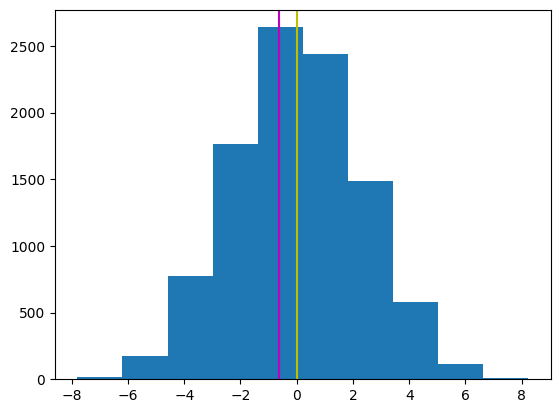

In [ ]:
#create a histogram

test_stat_average = np.average(sim_test_stats)
plt.hist(sim_test_stats)
plt.axvline(x = test_stat_average, c='y')
plt.axvline(x = obs_stat, c='m')

Conclusion: It is unlikely that there is a large difference in EDA seen between people who love rom-coms and people who love comedies. We cannot deduce that the average comedy lover at Belmont has a lower EDA than the average rom-com lover.

#Bootstrapping a Confidence Interval

Null: Queer students at belmont will have a significantly lower incidental happiness than the average Belmont Student

Alt: Queer students at belmont will not have a significantly higher incidental happiness than the average Belmont Student
Confidence Interval: 95%


In [ ]:
likert_unstraight = chosen_df[chosen_df['orientation'] != 'Straight']['Likert Reported']
avg_likert_unstraight = np.average(likert_unstraight)
print(likert_unstraight)
print(avg_likert_unstraight)

6      5
10    10
11     5
12     8
17     6
20     7
24     8
27     8
Name: Likert Reported, dtype: int64
7.125


In [ ]:
def one_bootstrap_mean():
  resample = likert_unstraight.sample(n=len(likert_unstraight), replace = True)
  bootstrapped_mean = np.average(resample)
  return bootstrapped_mean

In [ ]:
x = one_bootstrap_mean()
print(x)

7.0


In [ ]:
numsim=10000
bootstrap_means = []
for i in range(numsim):
  x = one_bootstrap_mean()
  bootstrap_means.append(x)
print (bootstrap_means)

left_interval_endpoint = np.percentile(bootstrap_means, 5)
print(left_interval_endpoint)

right_interval_endpoint = right = np.percentile(bootstrap_means, 95)
print(right_interval_endpoint)

[6.625, 8.125, 8.125, 6.75, 8.0, 7.375, 7.375, 6.75, 6.875, 6.125, 8.375, 7.375, 6.625, 7.125, 7.125, 7.25, 7.375, 6.125, 7.875, 7.75, 6.625, 7.375, 7.0, 7.25, 7.625, 8.25, 6.75, 7.625, 7.375, 7.5, 6.375, 6.5, 7.5, 6.75, 7.5, 7.875, 6.75, 7.375, 5.875, 7.25, 7.375, 8.375, 7.25, 6.75, 6.875, 7.25, 7.25, 7.5, 6.375, 7.5, 7.125, 6.75, 7.125, 7.0, 6.875, 7.375, 8.0, 7.0, 7.25, 8.25, 6.625, 7.25, 7.25, 7.0, 7.0, 6.875, 8.25, 7.0, 7.875, 6.0, 6.875, 6.25, 7.0, 7.0, 7.375, 6.75, 6.625, 7.5, 7.5, 7.5, 7.5, 7.5, 8.125, 7.5, 6.5, 7.5, 7.625, 7.875, 7.25, 7.125, 7.125, 5.875, 7.75, 8.0, 7.625, 7.375, 8.0, 7.875, 8.125, 6.875, 7.625, 7.125, 7.0, 7.0, 7.375, 5.5, 7.125, 7.125, 7.125, 6.5, 7.25, 7.125, 7.125, 6.625, 6.25, 7.75, 6.75, 7.125, 8.25, 7.25, 7.375, 7.125, 6.75, 8.25, 6.75, 6.875, 6.375, 7.25, 8.0, 6.75, 7.125, 7.5, 7.75, 6.375, 7.25, 6.25, 7.0, 6.375, 6.5, 6.75, 7.125, 6.75, 6.75, 6.75, 6.75, 7.75, 6.75, 6.625, 7.125, 6.375, 8.0, 6.875, 6.125, 7.125, 6.625, 6.75, 7.625, 7.125, 6.625, 7.25

7.761904761904762


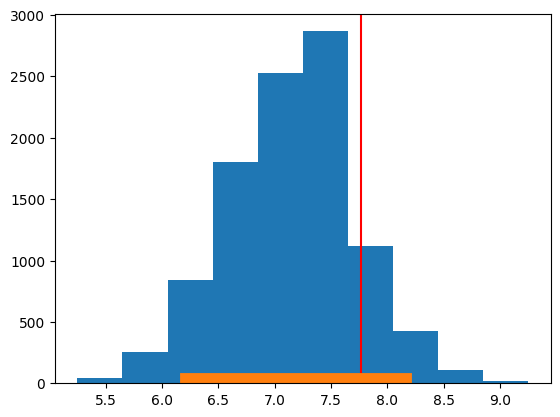

In [ ]:
#create histogram
straight_avg_mood = np.average(chosen_df[chosen_df['orientation'] == 'Straight']['Likert Reported'])



conf_int= np.array([left_interval_endpoint, right_interval_endpoint])
plt.hist(bootstrap_means)
#plt.axvline(x = left_interval_endpoint, c='r')
#plt.axvline(x = right_interval_endpoint, c='r')
plt.axvline(x = straight_avg_mood, c='')
print(straight_avg_mood)
plt.plot(conf_int, [0,0], linewidth = 15)

Conclusion: We cannot conclude with 95% confidence that the queer population at Belmont has a lower incidental happiness on average than the straight population at Belmont